In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot

pd.options.plotting.backend = "plotly"

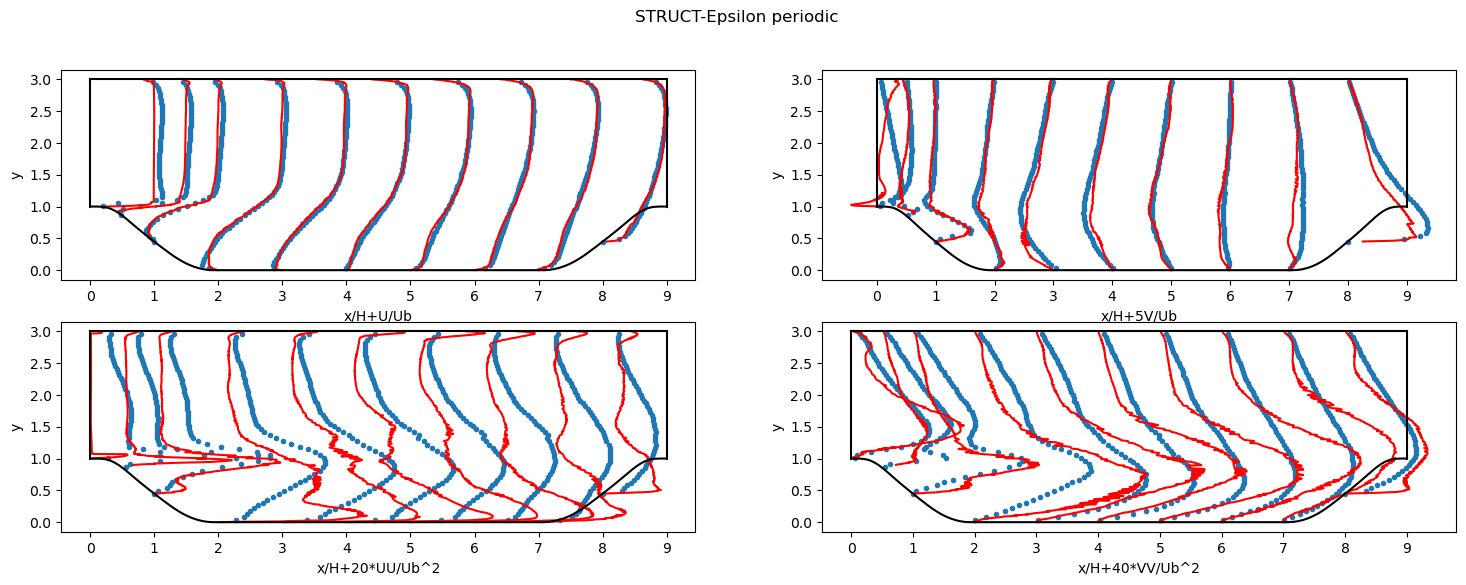

In [8]:
global Hill_h
Hill_h =0.028
global U_b
U_b = 7.567857

hill_shape= pd.read_csv("/home/juleslecoustre/Documents/PeriodicHill/CASE1/hill_coordinates.csv")
hill_shape=hill_shape.sort_values(by=["Points_0"])

experiment = pd.read_csv("/home/juleslecoustre/Documents/PeriodicHill/CASE1/hill.csv")

#Profiles_Path = Path("/home/juleslecoustre/Documents/PeriodicHill/CASE1/RESU/Cubic_Re10k_H28mm_add3000/profiles")

Cubic_periodic_BC = {"ProfileP":Path("/home/juleslecoustre/Documents/Acqua/PeriodicHill/Cubic_periodic_BC/profiles"),
                    "Iteration":"30000",
                    "Title":"Cubic"}

Cubic_crank_nicolson = {"ProfileP":Path("/home/juleslecoustre/Documents/Acqua/PeriodicHill/Cubic_crank_nicolson_add20k2/profiles"),
                    "Iteration":"50000",
                    "Title":"Cubic Crank Nicolson"}

SKE_periodic_BC = {"ProfileP":Path("/home/juleslecoustre/Documents/Acqua/PeriodicHill/SKE_periodic_BC/profiles"),
                    "Iteration":"30000",
                    "Title":"SKE"}

Struct_epsilon = {"ProfileP":Path("/home/juleslecoustre/Documents/Acqua/PeriodicHill/STRUCT_Cubic_log_avg/profiles"),
                    "Iteration":"40000",
                    "Title":"STRUCT-Epsilon periodic"}
Struct_epsilon_mapped = {"ProfileP":Path("/home/juleslecoustre/Documents/Acqua/PeriodicHill/STRUCT_Cubic_mapped_SOLU_RhieChow_Activated/profiles"),
                    "Iteration":"40000",
                    "Title":"STRUCT-Epsilon mapped"}


inputs = [Struct_epsilon]

measures = ["0","0.5","1","2","3","4","5","6","7","8"]
for study in inputs:
  Profiles_Path = study["ProfileP"]
  Title = study["Title"]
  Iter = study["Iteration"]
  fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(2*9,2*3))
  fig.suptitle(Title)
  ax = axes[0][0]
  for mes in measures:
    df = pd.read_csv(Profiles_Path.joinpath("{0}m_{1}.csv".format(mes,Iter)))
    col2  = []
    for col in df.columns:
        col2.append(str(col).strip(' '))
    df.columns = col2
    df["x/H+U/Ub"] = df["x"]/Hill_h + df["U_avg"]/U_b
    df["y/H"] = df["y"]/Hill_h
    ax.plot(df["x/H+U/Ub"],df["y/H"],c="r")
  ax.scatter(experiment["x+U/Ub"],experiment["y"],marker='.')
  ax.plot(hill_shape["Points_0"]/Hill_h,hill_shape["Points_1"]/Hill_h,c="black")
  ax.plot([0,0],[1,3],c="black")
  ax.plot([0,9],[3,3],c="black")
  ax.plot([9,9],[1,3],c="black")
  ax.set_xlabel("x/H+U/Ub")
  ax.set_xticks(range(10))
  ax.set_ylabel("y")

  #fig,ax = plt.subplots(figsize=(9,3))
  ax = axes[0][1]
  for mes in measures:
    df = pd.read_csv(Profiles_Path.joinpath("{0}m_{1}.csv".format(mes,Iter)))
    col2  = []
    for col in df.columns:
        col2.append(str(col).strip(' '))
    df.columns = col2
    df["y/H+5V/Ub"] = df["x"]/Hill_h + 5*df["V_avg"]/U_b
    df["y/H"] = df["y"]/Hill_h
    ax.plot(df["y/H+5V/Ub"],df["y/H"],c="r")
  ax.scatter(experiment["y-5*V/Ub"],experiment["y"],marker='.')
  ax.plot(hill_shape["Points_0"]/Hill_h,hill_shape["Points_1"]/Hill_h,c="black")
  ax.plot([0,0],[1,3],c="black")
  ax.plot([0,9],[3,3],c="black")
  ax.plot([9,9],[1,3],c="black")
  ax.set_xlabel("x/H+5V/Ub")
  ax.set_xticks(range(10))
  ax.set_ylabel("y")

  ax = axes[1][0]
  for mes in measures:
    df = pd.read_csv(Profiles_Path.joinpath("{0}m_{1}.csv".format(mes,Iter)))
    col2  = []
    for col in df.columns:
        col2.append(str(col).strip(' '))
    df.columns = col2
    #df["x/H+20*UU/Ub^2"] = df["x"]/Hill_h + 20*(df["UU_avg"])/U_b**2
    df["x/H+20*UU/Ub^2"] = df["x"]/Hill_h + 20*(df["UU_avg"]+df["U_squared"]-df["U_avg"]**2)/U_b**2
    df["y/H"] = df["y"]/Hill_h
    ax.plot(df["x/H+20*UU/Ub^2"],df["y/H"],c="r")
  #experiment["x/H+20uu/Ub**2"] =  experiment["x"]/Hill_h + 20*experiment["uu"]/Ub**2
  ax.scatter(experiment["uu"],experiment["y"],marker='.')
  ax.plot(hill_shape["Points_0"]/Hill_h,hill_shape["Points_1"]/Hill_h,c="black")
  ax.plot([0,0],[1,3],c="black")
  ax.plot([0,9],[3,3],c="black")
  ax.plot([9,9],[1,3],c="black")
  ax.set_xlabel("x/H+20*UU/Ub^2")
  ax.set_xticks(range(10))
  ax.set_ylabel("y")

  ax = axes[1][1]
  for mes in measures:
    df = pd.read_csv(Profiles_Path.joinpath("{0}m_{1}.csv".format(mes,Iter)))
    col2  = []
    for col in df.columns:
        col2.append(str(col).strip(' '))
    df.columns = col2
    #df["x/H+40*VV/Ub^2"] = df["x"]/Hill_h + 40*(df["VV_avg"])/U_b**2
    df["x/H+40*VV/Ub^2"] = df["x"]/Hill_h + 40*(df["VV_avg"]+df["V_squared"]-df["V_avg"]**2)/U_b**2
    df["y/H"] = df["y"]/Hill_h
    ax.plot(df["x/H+40*VV/Ub^2"],df["y/H"],c="r")
  #experiment["x/H+20uu/Ub**2"] =  experiment["x"]/Hill_h + 20*experiment["uu"]/Ub**2
  ax.scatter(experiment["vv"],experiment["y"],marker='.')
  ax.plot(hill_shape["Points_0"]/Hill_h,hill_shape["Points_1"]/Hill_h,c="black")
  ax.plot([0,0],[1,3],c="black")
  ax.plot([0,9],[3,3],c="black")
  ax.plot([9,9],[1,3],c="black")
  ax.set_xlabel("x/H+40*VV/Ub^2")
  ax.set_xticks(range(10))
  ax.set_ylabel("y")
plt.show()